## Telco Customer Churn

The main goal of this project is to predict the customer behaviors and suggest policies to reduce the churn rate. To calculate churn, simply divide the number of customers you lost by the end of the period by the total number of customers you started.

This dataset is available in Kaggle, in the link https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv.

First we are going to make an exploratory data analysis and identify the reasons that customers leave the company.

Then, we are going to build a machine learning model to predict if a client will leave the company or not.

The difficulty in this particular problem remains in the fact that we have unbalanced data, with a churn rate of 27%.


In [151]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [152]:
#Loading the dataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Here we have a list of all the features and their meaning, when necessary:

- customerID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn (target): Whether the customer churned or not (Yes or No)

In [153]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [154]:
#There are 7043 rows and 21 columns. 20 of the columns are features and 1 column is the target, that is the Churn.
df.shape

(7043, 21)

# EDA

In [155]:
#We see that there are no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [156]:
#No missing values.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [157]:
#The churn rate is 27%
df['Churn'].value_counts(), df['Churn'].value_counts(normalize=True)

(No     5174
 Yes    1869
 Name: Churn, dtype: int64,
 No     0.73463
 Yes    0.26537
 Name: Churn, dtype: float64)

<Axes: xlabel='Churn', ylabel='count'>

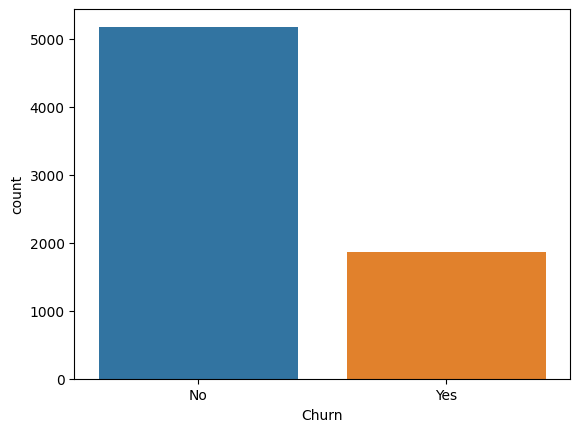

In [158]:
#We can see that the classes are unbalanced.
sns.countplot(data=df, x='Churn')

Let's analyze all the features and their correlation with the target, that is the Churn. We are going to analyze each feature in isolation. A feature can influence the target in a different way when combined with another one, but we will only consider this kind of relation later, when we build our machine learning model.

1 - Customer Id

In [159]:
#The CustomerID doesn't bring any information to our analysis. This feature will be excluded! As we have 7043 unique values, we can assume that there are no duplicates in the dataset.
df['customerID'].nunique()

7043

In [160]:
df.drop('customerID',axis=1,inplace=True)

2 - Gender

<Axes: xlabel='gender', ylabel='count'>

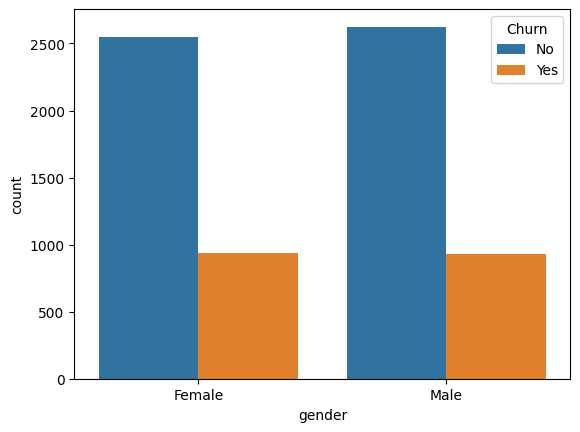

In [161]:
#It looks like the gender of the customer does not affect the Churn.
sns.countplot(data=df, x='gender',hue='Churn')

Conclusion: The gender does not seem to affect the churn rate.

3-SeniorCitizen

In [162]:
#Only 16% of the customers are senior citizens.
df['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

<Axes: xlabel='SeniorCitizen', ylabel='count'>

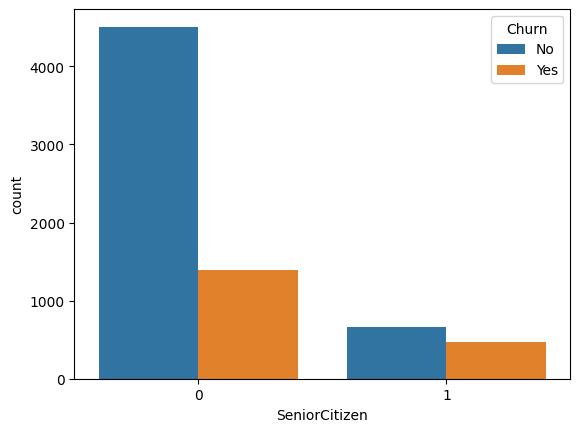

In [163]:
sns.countplot(data=df, x='SeniorCitizen',hue='Churn')

In [164]:
#23% of non senior citizens are no longer customers of Telco.
df.loc[df['SeniorCitizen']==0,'Churn'].value_counts(normalize=True)

No     0.763938
Yes    0.236062
Name: Churn, dtype: float64

In [165]:
#41% of senior citizens are no longer customers of Telco.
df.loc[df['SeniorCitizen']==1,'Churn'].value_counts(normalize=True)

No     0.583187
Yes    0.416813
Name: Churn, dtype: float64

Conclusion: On a superficial analysis it looks like senior citizens have higher probability to leave the company.

4-Partner and Dependents

In [166]:
#48% of the customers have partners.
df['Partner'].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

<Axes: xlabel='Partner', ylabel='count'>

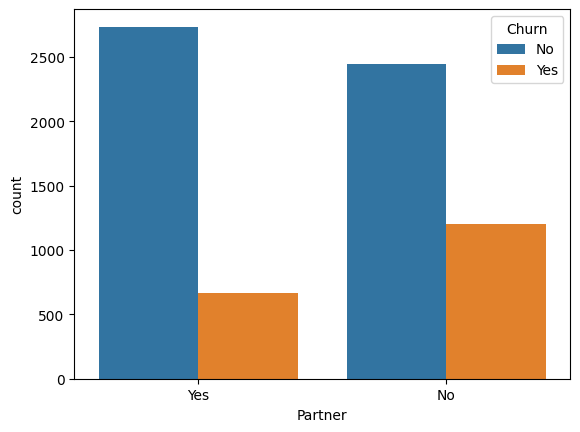

In [167]:
#It looks like people with no partners have higher probability to leave the company.
sns.countplot(data=df, x='Partner',hue='Churn')

In [168]:
#19% of the people that have partners leave the company.
df.loc[df['Partner']=='Yes','Churn'].value_counts(normalize=True)

No     0.803351
Yes    0.196649
Name: Churn, dtype: float64

In [169]:
#33% of people that don't have partners leave the company.
df.loc[df['Partner']=='No','Churn'].value_counts(normalize=True)

No     0.67042
Yes    0.32958
Name: Churn, dtype: float64

Let's take a look in the feature "Dependents".

In [170]:
#30% of the customers have dependents.
df['Dependents'].value_counts(normalize=True)

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

<Axes: xlabel='Dependents', ylabel='count'>

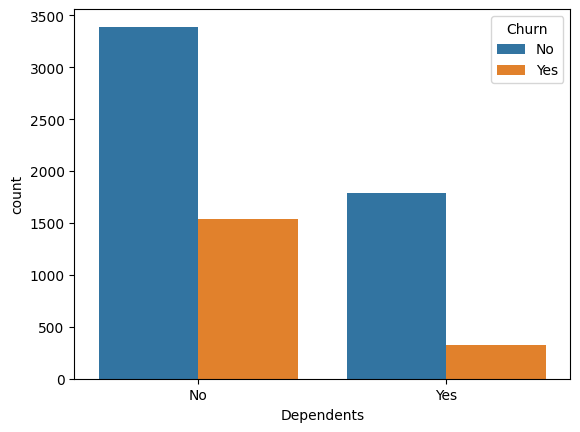

In [171]:
#It looks like people with no dependents have higher probability to leave the company.
sns.countplot(data=df, x='Dependents',hue='Churn')

In [172]:
#15% of the customers that have dependents leave Telco.
df.loc[df['Dependents']=='Yes','Churn'].value_counts(normalize=True)

No     0.845498
Yes    0.154502
Name: Churn, dtype: float64

In [173]:
#31% of the customers with no dependents leave Telco.
df.loc[df['Dependents']=='No','Churn'].value_counts(normalize=True)

No     0.687209
Yes    0.312791
Name: Churn, dtype: float64

Conclusion: Apparently people with no dependents nor partners have less probability to leave Telco. Maybe the ones with partners and/ or dependents need estability, and have less probability to change the telecom services. Another possibility is that the ones with dependents or partners contract family plans, that incentivate them to remain in Telco.

5 - Tenure

In [174]:
#To take a look on how the tenure affects the Churn, let's compare the distribution between the tenure of the clients that remains and the tenure of the clients that don't remain in Telco.

<Axes: xlabel='tenure', ylabel='Density'>

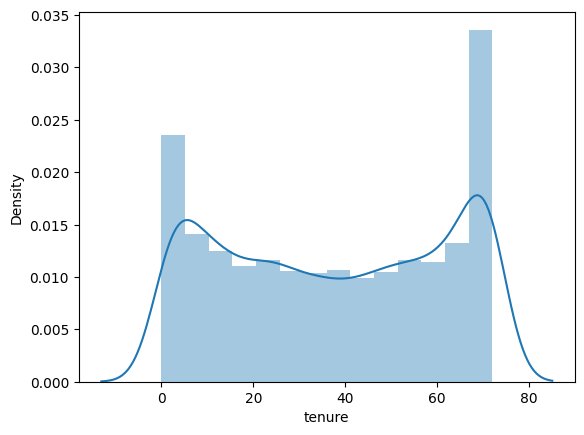

In [175]:
#Distribution of the tenure of the clients that remain in Telco.
sns.distplot(df.loc[df['Churn']=='No','tenure'])

<Axes: xlabel='tenure', ylabel='Density'>

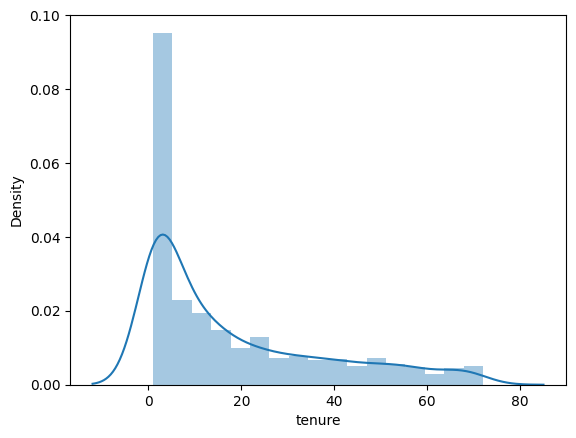

In [176]:
##Distribution of the tenure of the clients that don't remain in Telco.
sns.distplot(df.loc[df['Churn']=='Yes','tenure'])

From these distribution plots, we can see that how longer is the tenure, lower is the churn rate. Let's also compare the boxplots.

<Axes: xlabel='Churn', ylabel='tenure'>

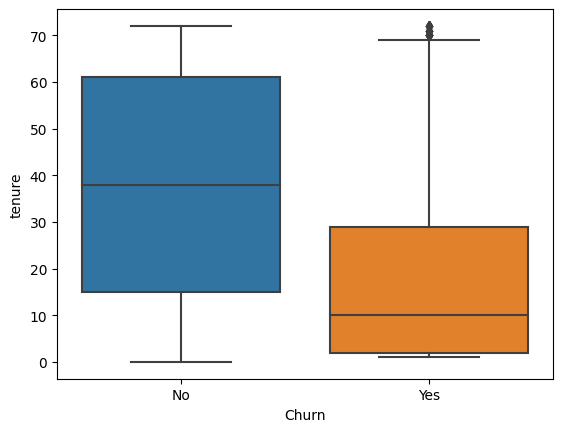

In [177]:
sns.boxplot(x='Churn', y='tenure', data=df)

Conclusion: From the distribution and boxplots above, we assume that the longer the tenure, lower is the churn rate. Long date customers are more faithful to the company than new ones. They are also less price elastic.

6 - Services

Now we are going to take a look to all the services and see which of them have the bigger impact on the churn rate. The services are:

- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies



In [178]:
#Creating a list of services.
services=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

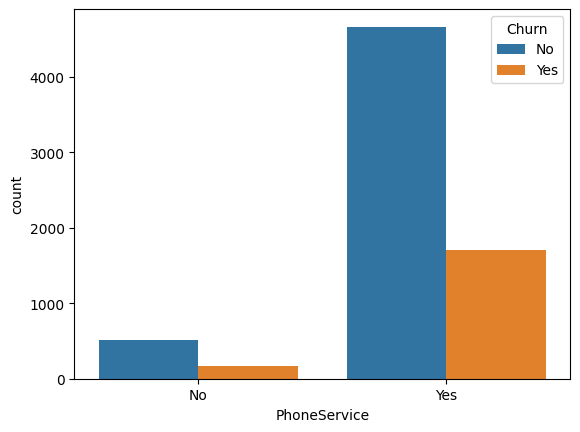

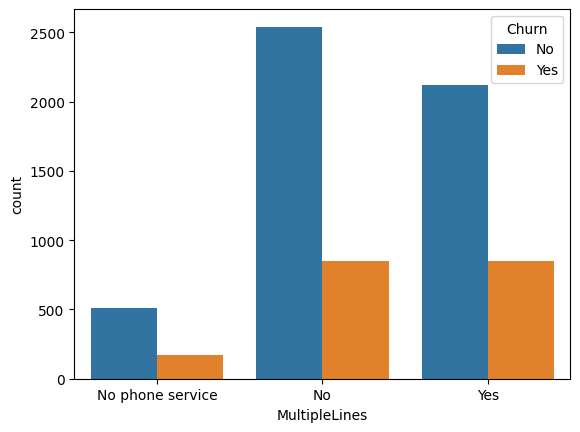

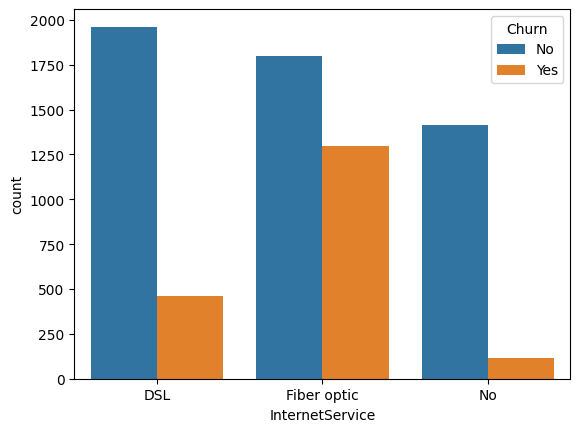

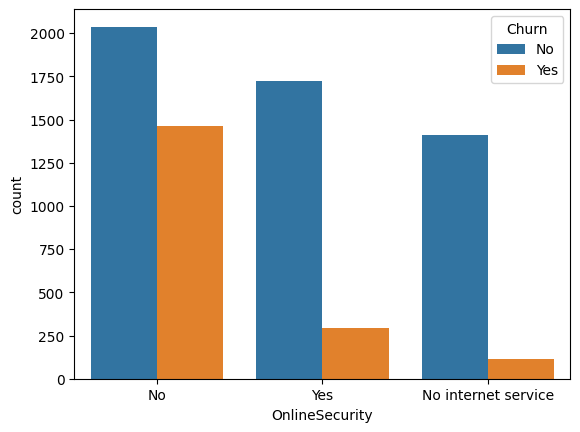

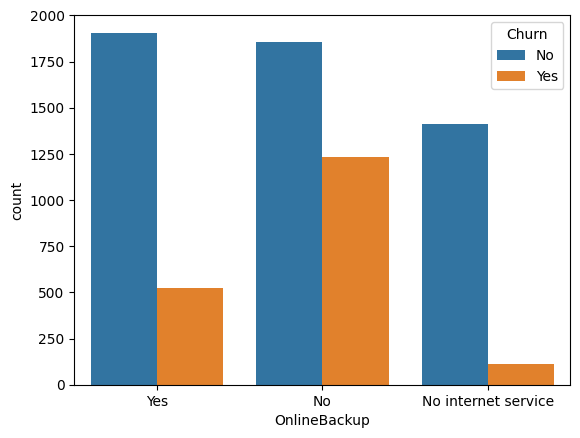

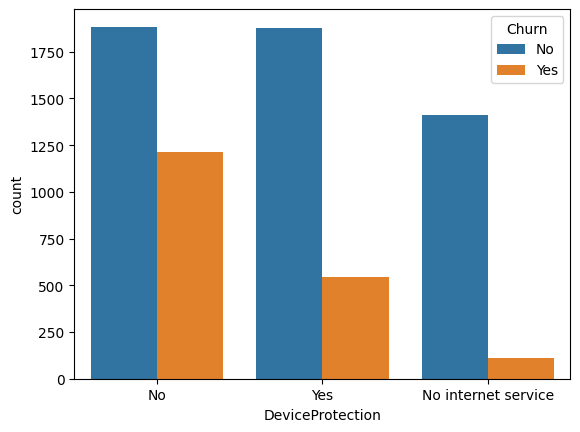

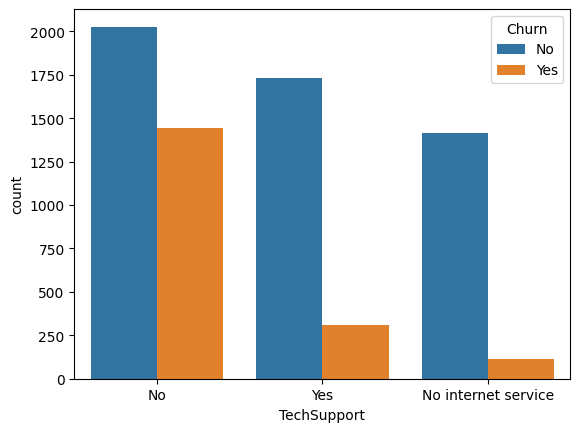

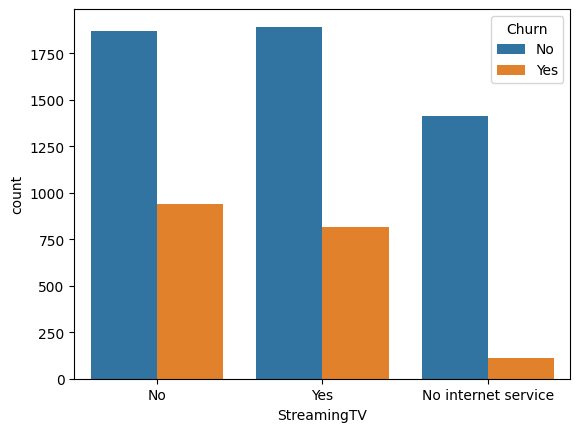

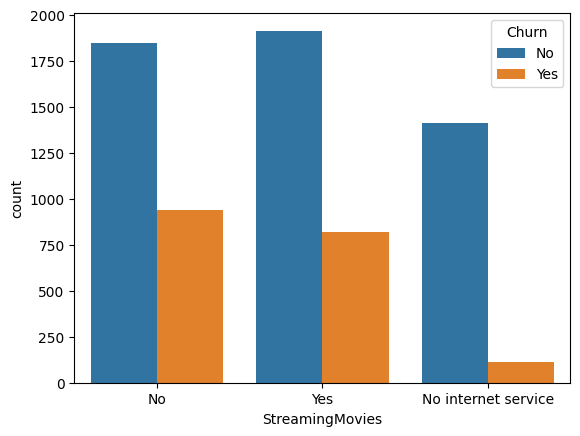

In [179]:
for i in services:
  sns.countplot(data=df, x=i,hue='Churn')
  plt.show()

Conclusion: From the graphics above we can see that some services have a higuer churn rate than others. We can quote the fiber optic service. Later we are going to build a machine learning model, that will use these variables in the proper way to predict whether a customer will leave Telco or not.

7 - Contract

In [180]:
#Distribution between the types of contracts
df['Contract'].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

<Axes: xlabel='Contract', ylabel='count'>

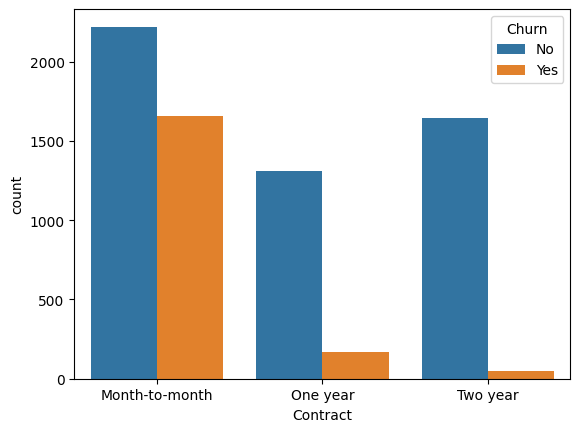

In [181]:
#It's clear that the churn rate is bigger with customers with month-to-month contracts.
sns.countplot(data=df, x='Contract', hue='Churn')

In [182]:
#Percentage of churn from contracts Month-to-month.
df.loc[df['Contract']=='Month-to-month','Churn'].value_counts(normalize=True)

No     0.572903
Yes    0.427097
Name: Churn, dtype: float64

In [183]:
#Percentage of churn from contracts of one year.
df.loc[df['Contract']=='One year','Churn'].value_counts(normalize=True)

No     0.887305
Yes    0.112695
Name: Churn, dtype: float64

In [184]:
#Percentage of churn from contracts of two years.
df.loc[df['Contract']=='Two year','Churn'].value_counts(normalize=True)

No     0.971681
Yes    0.028319
Name: Churn, dtype: float64

We can clearly see that the longer the period of the contract, lower is the  churn rate. Let's look now only to the people that left Telco and see the distribution of the types of contract.

In [185]:
#more than 88% of the churn rate is from contracts Month-to-month
df.loc[df['Churn']=='Yes','Contract'].value_counts(normalize=True)

Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: Contract, dtype: float64

<Axes: xlabel='Contract', ylabel='count'>

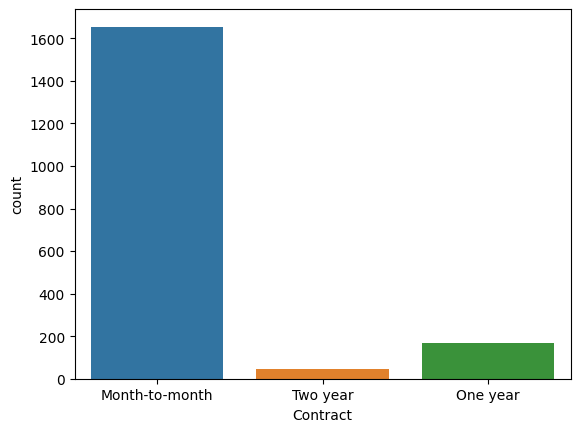

In [186]:
sns.countplot(data=df.loc[df['Churn']=='Yes'], x='Contract')

Conclusion: The longer is the contract period, lower is the churn rate. This conclusion seems like the one we took analyzing the tenure. Longer contracts demonstrate that the customer wants to be loyal to the company.

8 - PaperlessBilling

In [187]:
#40% of the customers don't have paperless billing.
df['PaperlessBilling'].value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

<Axes: xlabel='PaperlessBilling', ylabel='count'>

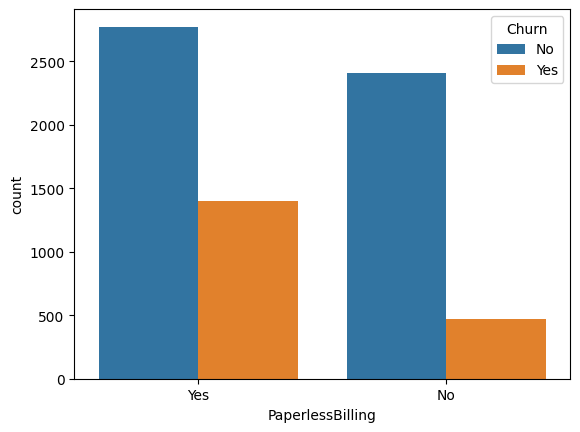

In [188]:
sns.countplot(data=df, x='PaperlessBilling',hue='Churn')

In [189]:
#16% of the customers that don't have paperlessbilling leave Telco.
df.loc[df['PaperlessBilling']=='No','Churn'].value_counts(normalize=True)

No     0.836699
Yes    0.163301
Name: Churn, dtype: float64

In [190]:
#34% of the customers that have paperlessbilling leave Telco.
df.loc[df['PaperlessBilling']=='Yes','Churn'].value_counts(normalize=True)

No     0.664349
Yes    0.335651
Name: Churn, dtype: float64

Conclusion: It seems like the ones that have paperlessbilling have bigger probability to leave Telco.




9 - PaymentMethod

In [191]:
#These are the types og paymet methods.
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [192]:
#Distribution of payment methods.
df['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

<Axes: xlabel='PaymentMethod', ylabel='count'>

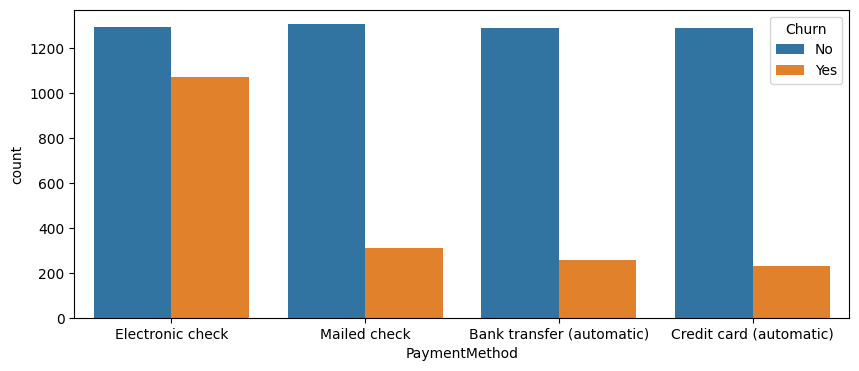

In [193]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='PaymentMethod',hue='Churn')

Conclusion: We can easily see that the ones that pay using electronic checks have bigger influence in churn rate. The company can encourage people to use other payments methods.

10 - MonthlyCharges

In [194]:
#To take a look on how the monthly charged affects the Churn, let's compare the distribution between the monthly charged of the clients that remains and the monthly charged of the clients that don't remain in Telco.

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

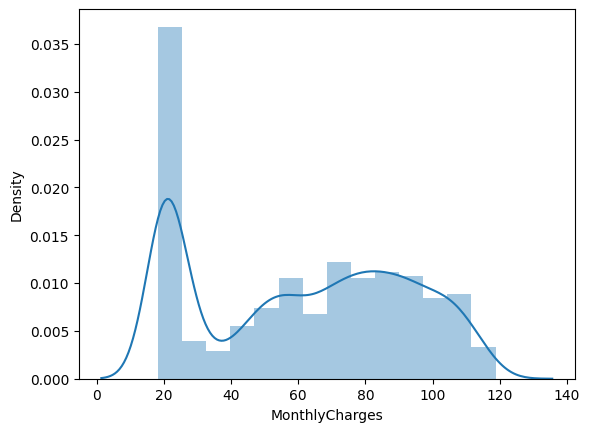

In [195]:
#Distribution of monthly charged of clients that remains in Telco.
sns.distplot(df.loc[df['Churn']=='No','MonthlyCharges'])

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

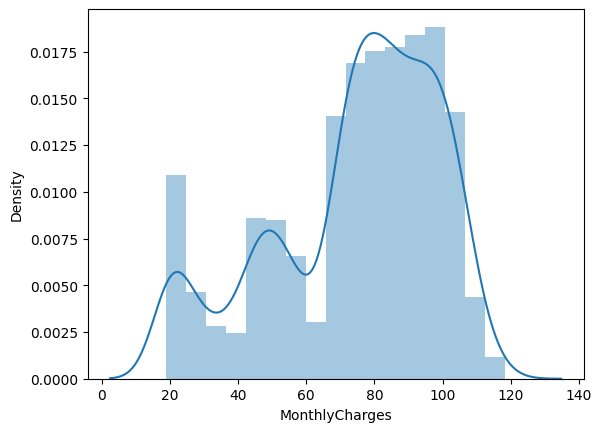

In [196]:
##Distribution of monthly charged of clients that don't remain in Telco.
sns.distplot(df.loc[df['Churn']=='Yes','MonthlyCharges'])

From these distribution plots, we can see that how bigger is the monthly charged, bigger is the churn rate. Let's compare the boxplots.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

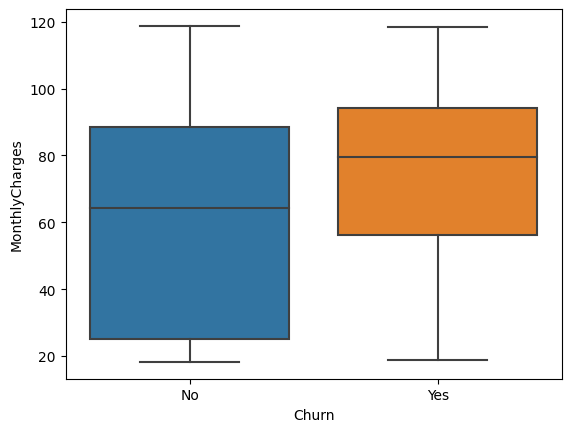

In [197]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

Conclusion: From the distribution and boxplots above, we assume that the bigger is the monthly charged, bigger is the churn rate.

11 - TotalCharges

In [198]:
# Preprocessing the feature, as there are strings in data.
df.loc[df['TotalCharges']==' ','TotalCharges']=0
df['TotalCharges']=df['TotalCharges'].astype('float')

In [199]:
#To take a look on how the total charged affects the Churn, let's compare the distribution between the total charged of the clients that remains and the total charged of the clients that don't remain in Telco.

<Axes: xlabel='TotalCharges', ylabel='Density'>

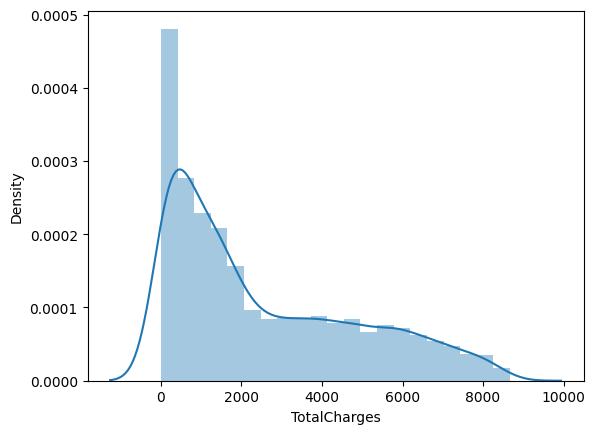

In [200]:
#Distribution of TotalCharges of clients that remain in Telco.
sns.distplot(df.loc[df['Churn']=='No','TotalCharges'])

<Axes: xlabel='TotalCharges', ylabel='Density'>

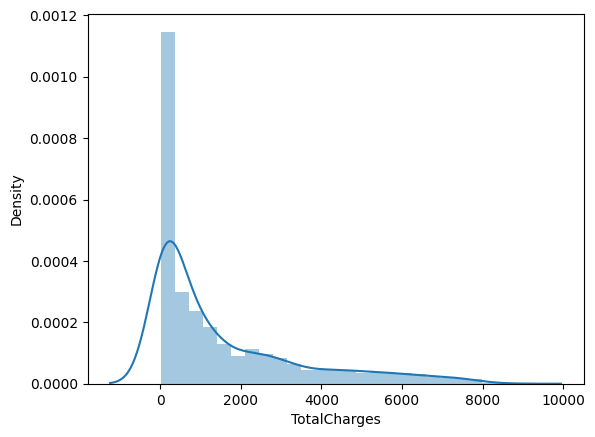

In [201]:
#Distribution of TotalCharges of clients that don't remain in Telco.
sns.distplot(df.loc[df['Churn']=='Yes','TotalCharges'])

From these distribution plots, we can see that how bigger is the total charged, lower is the churn rate. Let's compare the boxplots.

<Axes: xlabel='Churn', ylabel='TotalCharges'>

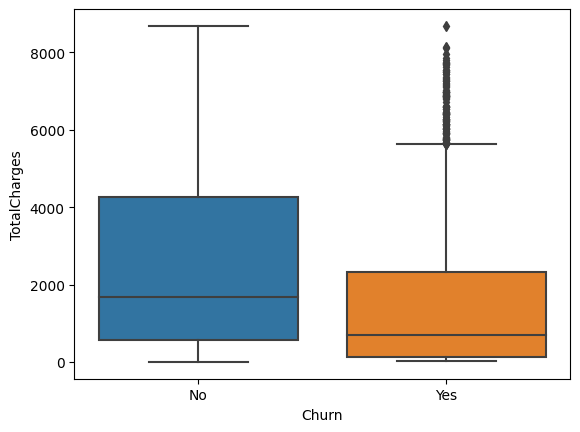

In [202]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

Conclusion: From the distribution and boxplots below, we assume that the bigger is the total charged, lower is the churn rate.

Differentely of the monthly charged, the total charged has a high positive correlation with the tenure and, as we have already seen, with bigger tenure, lower is the churn rate.

In other words, the negative correlation between the TotalCharges and the churn rate is consequence, and not a cause. Remember, correlation does not imply causation.

This negative correlation is a consequence of the tenure and probably also is a consequence of the utilization of packages of services.

#Data Preprocessing

As we have some categorical features to analyze, let's turn than into numeric using the label encoding. We are going to use later RandomForestClassifier, that is an algorithm that handles well with label encoding. It won't be necessary to use one hot encoding and increase de dimensionality.


In [203]:
objects=df.select_dtypes(include=['object']).columns
for i in objects:
  le = preprocessing.LabelEncoder()
  df[i]=le.fit_transform(df[i])


Now that all of the fetaures are numeric, let's show their correlation with the target and sort the values.

In [204]:
#As we can see in the table below, our assumptions in EDA were correct.
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Axes: >

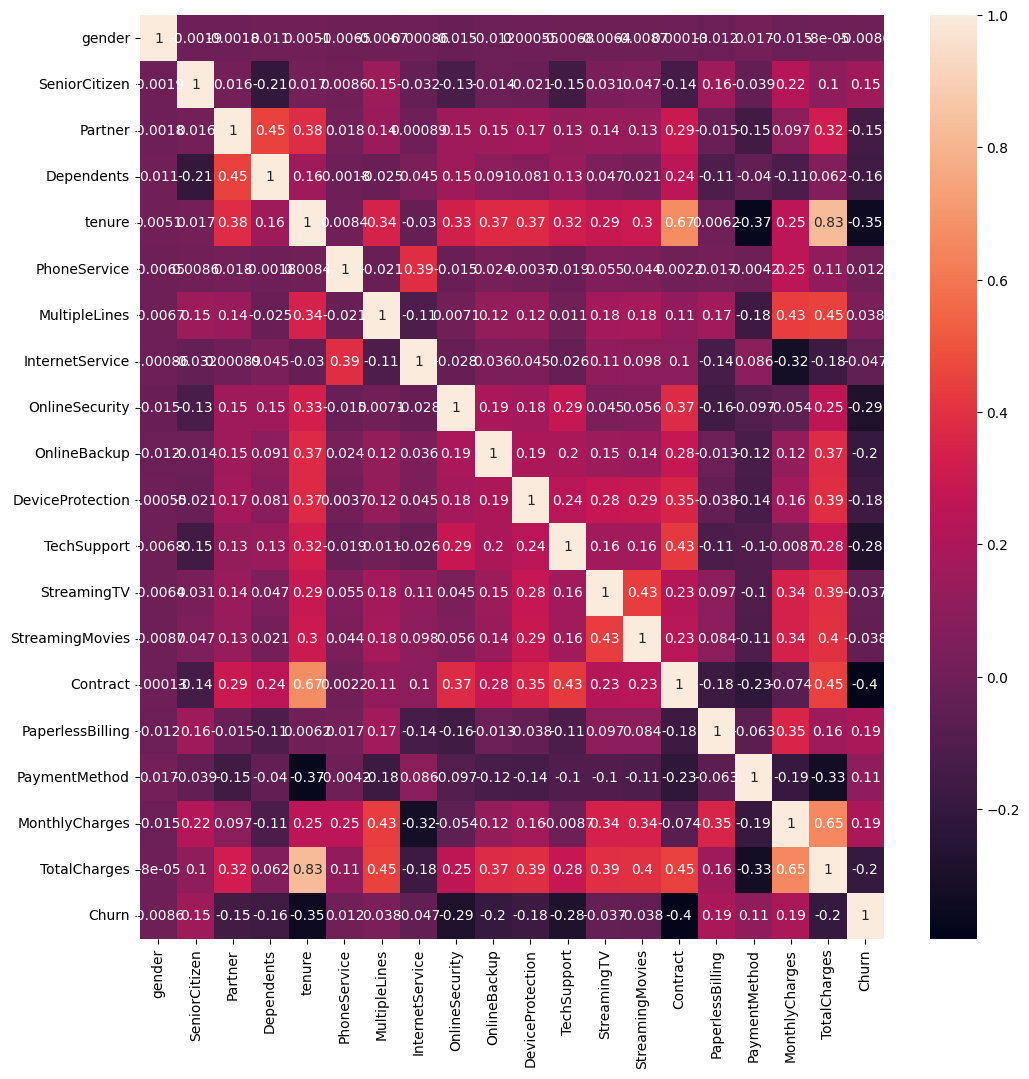

In [205]:
#Let's show a correlation plot.
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

Looking to the correlation plot above we can see the presence of multicolinearity. We can quote, as we have already presented, the high correlation between tenure and TotalCharges, 0.85.

Now we are going to detect the presence of multicollinearity using the VIF (Variance Inflation Factor).

* If VIF = 1, very low multicollinearity.

* If VIF <5, moderate multicollinearity.

* If VIF>5, extreme multicollinearity.

Calculating VIF scores:

In [206]:
def calculate_vif(data):
  vif_df=pd.DataFrame(columns=['var', 'vif'])
  x_var_names=data.columns
  for i in range (0, x_var_names.shape[0]):
    y=data[x_var_names[i]]
    x=data[x_var_names.drop([x_var_names[i]])]
    r_squared=sm.OLS(y,x).fit().rsquared # OLS é ordinary least squares, ou mínimos quadrados ordinários.
    vif=round(1/(1-r_squared),2)
    vif_df.loc[i]=[x_var_names[i],vif]
  return vif_df.sort_values(by= 'vif', axis=0, ascending=False, inplace=False)

In [207]:
calculate_vif(df.drop('Churn',axis=1))

,var,vif
17,MonthlyCharges,20.46
5,PhoneService,15.14
4,tenure,14.91
18,TotalCharges,13.82
7,InternetService,4.35
14,Contract,4.16
13,StreamingMovies,3.26
12,StreamingTV,3.24
16,PaymentMethod,3.10
15,PaperlessBilling,2.87


As we have multicolinearity, instead of excluding variables, we are going to use a tree based model, that is not affected by it.

In [208]:
# Spliting the explanatory variables from the target.
x=df.drop('Churn',axis=1)
y=df['Churn']

In [209]:
# Spliting the data in training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, stratify=y, random_state=50)

In [210]:
#Oversampling the data, as we have unbalanced data.
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
x_train=pd.DataFrame(x_train)


Must be highlighted that our model will be a tree based model, so won't be necessary to standardizate/ normalize de data.

#Creating and Training the Model

The model should be a classifier model and for that I tried several models. I tried to stack some estimators but the best and most efficient result was generated by RandomForestClassifier.




In [211]:
# Instantiating the model and fitting with train data
model1=RandomForestClassifier(max_depth=10, min_samples_leaf=15,random_state=50)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15, random_state=50)

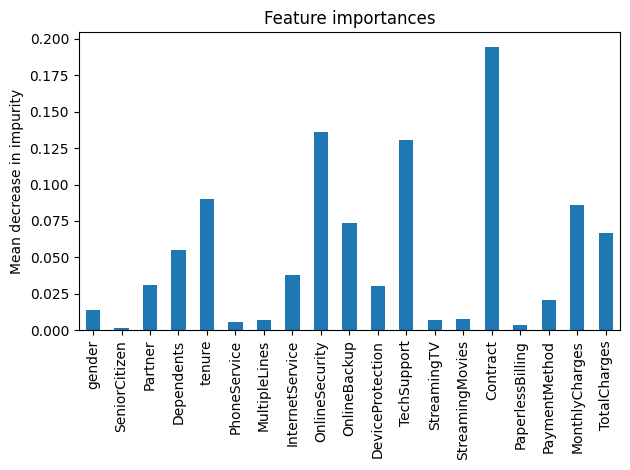

In [212]:
#Let's show the feature importances
importances=model1.feature_importances_
forest_importances = pd.Series(importances, index=x.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#Model Evaluation

As the data are unbalanced, accuracy is not a good metric. We are going to validate our model using precision, recall and f1-score.

In [213]:
#Predicting the results for the train and validation dataset. Analizing both is good to see the degree of overfitting we have in the model.
predicttrain=model1.predict(x_train)
predictval=model1.predict(x_val)

In [214]:
#Classification Report of training dataset.
print(classification_report(y_train,predicttrain))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3104
           1       0.85      0.88      0.86      3104

    accuracy                           0.86      6208
   macro avg       0.86      0.86      0.86      6208
weighted avg       0.86      0.86      0.86      6208



In [215]:
#Classification Report of validation dataset.
print(classification_report(y_val,predictval))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2070
           1       0.55      0.67      0.60       748

    accuracy                           0.76      2818
   macro avg       0.71      0.73      0.72      2818
weighted avg       0.78      0.76      0.77      2818



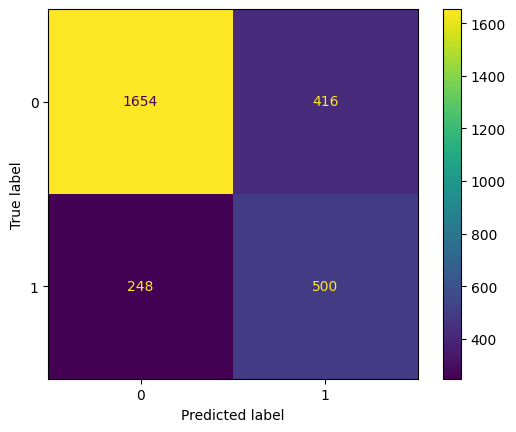

In [216]:
#Confusion Matrix
cm=confusion_matrix(y_val, predictval)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

We have already calculated the metrics, but in a way that our validation become more robust, is advisable that we use cross validation.

As we had a transformer after sampling the data, we can use a pipeline. The transformer is a SMOTE oversample, so I will use the Pipeline from the imblearn library instead of the SKLearn one.

In [217]:
# Here we can see after the cross validation 56% of precision, 69% of recall and 62% of f1-score
pipe = imbpipeline([('oversample', oversample) ,('rf', model1)])
cv = StratifiedKFold(n_splits = 5, shuffle = True)
f1=cross_val_score(pipe, x,y, cv = cv, scoring='f1')
recall=cross_val_score(pipe, x,y, cv = cv, scoring='recall')
precision=cross_val_score(pipe, x,y, cv = cv, scoring='precision')


np.mean(precision),np.mean(recall), np.mean(f1)

(0.5675903580218995, 0.6987756447936231, 0.6215026418895031)

# Final Conclusions

Our model indicated that 1/3 of the clients could leave Telco. 69% of the customers that left Telco are included in this percentage.

A manager can adopt different policies to encourage these people to remain in the company. These policies will be applied to 1/3 of the customers in order to reduce to 69% of the churn rate. This percentage represents 19% of all the customers of Telco.

Our model privileged the recall (69%) over precision (56%) because is worse to have a false negative than a false positive in this case, but this balance between both can be calibrated just changing the threshold.

It must be calculated the cost to implement the policy to each costumer and the LTV (Lifetime Value) brought by keeping a customer in the company. As changing the threshold we can change precision and recall, but not in a linear way, the manager should calculate the optimal threshold, that is the one that brings the biggest profit. It's good to remeber that we have a trade-off between precision and recall.

Said that, using our exploratory data analysys, here are some policies that can be used to the people indicated in our model:

- Increase the months a client stay in the company (tenure), by giving descounts and benefits from time to time;
- Grant discounts in services with higher churn rate, as fiber optic for instance. Also investigate if there are any problem with the service provided;
- Encourage customers to sign contracts of one or two year, in ispite of month-to-month. Descounts and bonus services can be provided;
- Only use paperless billing if the customer request it;
- Encourage customers to use payment methods different from electronic check. Descounts can be provided for other payment methods;
- As new costumers are more price elastic, start new contracts with a lower monthly charge;
- In addition to increase the tenure, as we have already seen, Telca can make promotions with combo of services.

